# Week 3 - Data visualization

## Ex 1

In [51]:
import pandas as pd
import numpy as np
from scipy import stats

In [52]:
data1=pd.read_csv('data1.tsv',sep='\t', header=None, names=['x', 'y'])
data2=pd.read_csv('data2.tsv',sep='\t', header=None, names=['x', 'y'])
data3=pd.read_csv('data3.tsv',sep='\t', header=None, names=['x', 'y'])
data4=pd.read_csv('data4.tsv',sep='\t', header=None, names=['x', 'y'])
data = [data1, data2, data3, data4]

Data0 
 ['9.00', '7.50'] 
 ['3.162', '1.937'] 
 ['0.816', '0.002'] 
 ['0.500', '3.000']
Data1 
 ['9.00', '7.50'] 
 ['3.162', '1.937'] 
 ['0.816', '0.002'] 
 ['0.500', '3.001']
Data2 
 ['9.00', '7.50'] 
 ['3.162', '1.936'] 
 ['0.816', '0.002'] 
 ['0.500', '3.002']
Data3 
 ['9.00', '7.50'] 
 ['3.162', '1.936'] 
 ['0.817', '0.002'] 
 ['0.500', '3.002']


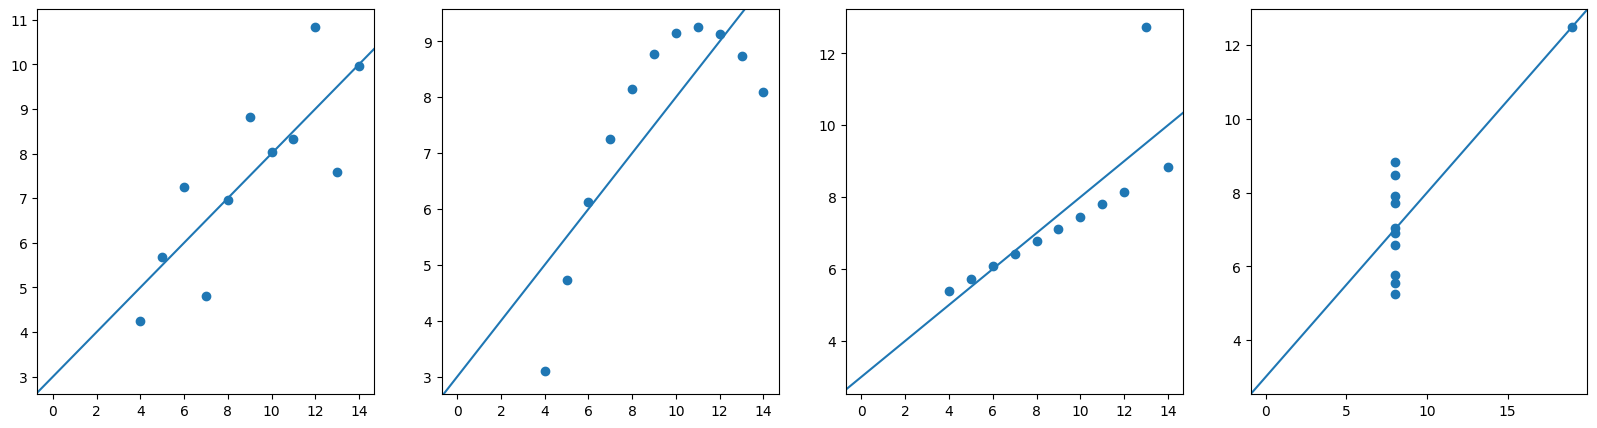

In [75]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(20,5))
for i, df in enumerate(data):
    mu = ['%.2f' % elem for elem in np.mean(df, 0)]
    std = ['%.3f' % elem for elem in np.std(df, 0)]
    pear = ['%.3f' % elem for elem in stats.pearsonr(df.x, df.y)]
    slope, intercept, r_value, p_value, std_err = stats.linregress(df.x,df.y)
    line = ['%.3f' % elem for elem in [slope, intercept]]
    axs[i].scatter(df.x, df.y)
    axs[i].axline((0, intercept), slope=slope)
    print(f'Data{i} \n', f'{mu} \n',f'{std} \n', f'{pear} \n' , f'{line[:2]}')
    


## Ex 2

In [81]:
papers = pd.read_csv('paper_df.csv')
citations = papers[papers.year == 2009]
citations

,paperId,title,year,DOI,citationCount,fields,authorIds
31,0da02f350aca6fcadb75de4f1b52e95b4b5949fe,SYNCHRONIZATION PHENOMENA IN INTERNAL REACTION...,2009,10.1142/9789814287456_0027,1,[],"['143851134', '1809355', '2773799', '3315735']"
32,f5b326a7fcbe91ef3940f3182872e73c514e6bd1,Corrigendum to “Sufficient conditions for emer...,2009,10.1016/J.JTBI.2008.12.015,1,['Psychology'],"['1809355', '143851134', '3315735', '145479337..."
51,2b55593f9ffb555a2baa18beb07fb2ee5b308eee,Pattern Based Clustering,2009,10.1007/978-0-387-39940-9_3254,0,[],"['2112893280', '1796237', '1733199', '14425584..."
52,618b21a1abf742629567ebb36b3b8b283e37d0b6,Probabilistic Analysis,2009,10.1007/978-0-387-39940-9_3333,71,[],"['2112893280', '1796237', '1733199', '14425584..."
53,7f17b12550549f5ee962037fa7e27715886f9c38,Biological Pathways,2009,10.1007/978-0-387-39940-9_2114,15,['Biology'],"['2121614657', '1731633', '1393940329', '17837..."
...,...,...,...,...,...,...,...
313038,7865fab232767e00218236892360ff05eb642792,Inhibition of mitochondrial membrane permeabil...,2009,10.2174/092986709789712871,64,['Biology'],"['78183095', '37888919', '40367711', '4152049']"
313039,9b541458cb68d4ee9fdd53b22bff3553a5351d69,[Heart rate reduction: beneficial effects in h...,2009,10.2515/therapie/2009013,6,"['Medicine', 'Biology']","['4152049', '1918257', '9829314', '4131871', '..."
313040,aec0abfa99d3995e0f599c9668cad83ed83c0800,F011 Effect of ivabradine on myocardial systol...,2009,10.1016/S1875-2136(09)72264-8,0,"['Medicine', 'Biology']","['1918257', '9829314', '49926432', '4211671', ..."
313041,dd25424f37e91fea96068124ed8e0801f4a42ce7,Cardioprotection against myocardial infarction...,2009,10.1016/j.yjmcc.2009.02.005,23,"['Biology', 'Medicine']","['6273060', '49926432', '3974864', '5622426', ..."


In [109]:
citationCount = papers.citationCount.to_numpy()
print(min(citationCount), max(citationCount))

0 93447


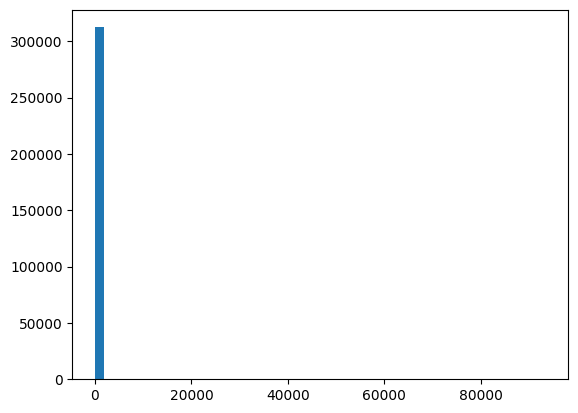

In [129]:
plt.hist(citationCount, bins=np.linspace(min(citationCount), max(citationCount)))
plt.show()

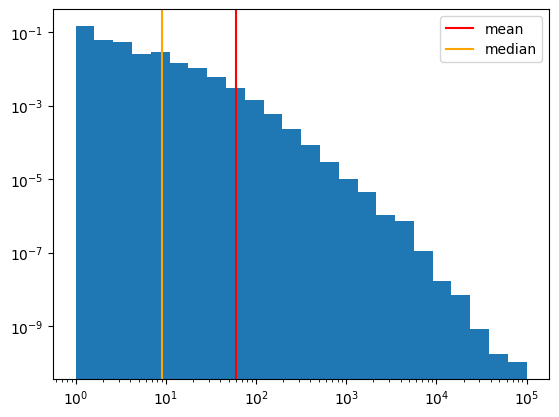

In [156]:
bins = np.logspace(0, np.log10(100000), 25)
plt.hist(citationCount, bins=bins, density=True, log=True)
plt.xscale('log')
plt.axvline(np.mean(citationCount), color='r', label='mean')
plt.axvline(np.median(citationCount), color='orange', label='median')
plt.legend()
plt.show()

## Ex 3

In [223]:
n=10000
pts = pd.DataFrame(np.random.normal(loc=0, scale=4, size=n))
pts

,0
0,0.989135
1,-6.893941
2,4.620938
3,-4.355701
4,0.048075
...,...
9995,-4.365930
9996,-1.814762
9997,-5.123536
9998,2.481539


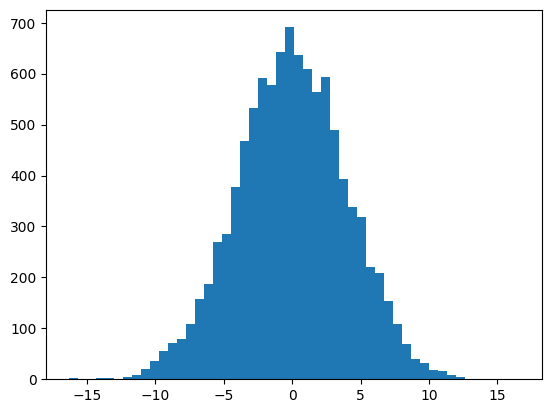

In [224]:
plt.hist(pts, 50)
plt.show()

In [225]:
cumsum = pts.expanding(1).mean()


In [226]:
cumstd = pts.expanding(1).sem()
cumstd[0][0] = 0
cumstd

,0
0,0.000000
1,5.574176
2,4.162584
3,2.997755
4,2.271830
...,...
9995,0.040040
9996,0.040036
9997,0.040035
9998,0.040032


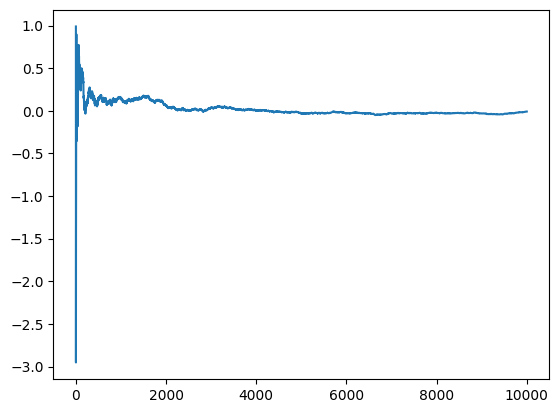

In [227]:
plt.plot(np.arange(0, len(cumsum)), cumsum)
